Notebook for exploring 10x multiomics data based on the scanpy preprocessing <a href=https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html>tutorial</a>. Currently only investigates scRNA-seq data.
Some informative resources:
- Cell annotation: https://www.sc-best-practices.org/cellular_structure/annotation.html
- Current best practice in scRNA-seq analysis(2019): https://www.embopress.org/doi/full/10.15252/msb.20188746

In [11]:
# Imports
import numpy as np
import scanpy as sc
from pathlib import Path
import anndata as an
import warnings
import pandas as pd

In [12]:
file = "path/to/data/UT+24hCA_6ct_UT_pp.h5ad"
adata =  an.read_h5ad(file)
adata

AnnData object with n_obs × n_vars = 130728 × 2925
    obs: 'cell_id', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'barcode', 'barcode_1', 'barcode_lane', 'lane', 'batch', 'percent.mt', 'nCount_RNA_mad', 'nFeature_RNA_mad', 'confined_best_match_sample', 'confined_second_match_sample', 'confined_best_match_correlation', 'confined_second_match_correlation', 'confined_condition', 'unconfined_best_match_sample', 'unconfined_second_match_sample', 'unconfined_best_match_correlation', 'unconfined_second_match_correlation', 'unconfined_condition', 'soup_cluster', 'soup_status', 'soup_singlet_posterior', 'soup_doublet_posterior', 'soup_log_prob_singleton', 'soup_log_prob_doublet', 'soup_cluster0', 'soup_cluster1', 'soup_cluster2', 'soup_cluster3', 'soup_cluster4', 'soup_cluster5', 'soup_cluster6', 'soup_cluster7', 'sample_final', 'final_condition', 'predicted.mo_10x_cell_type', 'predicted.mo_10x_cell_type.score', 'predicted.mo_10x_cell_type.lowerres', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.

In [2]:
# DATA_DIR = Path("../Data/SCDRS/multiome")

# h5ad_files = {
#     "monocytes" :DATA_DIR / "Mono_subset_UT.h5ad",
#     "CD4" : DATA_DIR / "CD4_T_subset_UT.h5ad"
# }
# # Using read_h5ad instead of read_10x_h5 since the files contain imputed celltypes, suggesting some processing has been done.
# # This might be true for various preprocessing steps as well.
# adata = ad.concat({celltype : sc.read_h5ad(file) for celltype, file in h5ad_files.items()}, label="celltype")

# # adata.obs_names_make_unique()
# print(adata.obs["celltype"].value_counts())
# adata

celltype
monocytes    2714
CD4          2074
Name: count, dtype: int64


AnnData object with n_obs × n_vars = 4788 × 36601
    obs: 'orig.ident', 'nCount_RNA_v5', 'nFeature_RNA_v5', 'nCount_RNA', 'nFeature_RNA', 'barcode', 'barcode_1', 'barcode_lane', 'lane', 'batch', 'percent.mt', 'nCount_RNA_mad', 'nFeature_RNA_mad', 'confined_best_match_sample', 'confined_second_match_sample', 'confined_best_match_correlation', 'confined_second_match_correlation', 'confined_condition', 'unconfined_best_match_sample', 'unconfined_second_match_sample', 'unconfined_best_match_correlation', 'unconfined_second_match_correlation', 'unconfined_condition', 'soup_cluster', 'soup_status', 'soup_singlet_posterior', 'soup_doublet_posterior', 'soup_log_prob_singleton', 'soup_log_prob_doublet', 'soup_cluster0', 'soup_cluster1', 'soup_cluster2', 'soup_cluster3', 'soup_cluster4', 'soup_cluster5', 'soup_cluster6', 'soup_cluster7', 'sample_final', 'final_condition', 'predicted.mo_10x_cell_type', 'predicted.mo_10x_cell_type.score', 'predicted.mo_10x_cell_type.lowerres', 'nCount_SCT', 'nFea

**Notes:** <br>
Variables seem to be the same for both subsets<br>
*nCount_RNA_mad (Median Absolute Deviation):* 
- MAD is used for outlier detection in scRNA-seq data.
- If nCount_RNA_mad is high, it suggests greater variability in RNA counts across cells.
- If nCount_RNA_mad is low, RNA counts are more consistent across cells. <br>

Unknown variables that seem interesting:<br>
"unconfined_best_match_sample" <br>


In [9]:
# Predicted cell types columns
adata.obs[['predicted.mo_10x_cell_type.lowerres','predicted.mo_10x_cell_type','celltype_imputed_lowerres']][0:10]

,predicted.mo_10x_cell_type.lowerres,predicted.mo_10x_cell_type,celltype_imputed_lowerres
CTAAGTCAGGGTGAAC_230105_lane1,NK,NK,monocyte
CTGTTGGAGTGACCTG_230105_lane1,NK,NK,monocyte
AGCACAGCACTCAACA_230105_lane1,unannotated,unannotated,monocyte
CATATCGCACAACCTA_230105_lane1,unannotated,unannotated,monocyte
TTAGAAGCAAGATTCT_230105_lane1,unannotated,unannotated,monocyte
GTTGCCCGTCCGTAGG_230105_lane1,unannotated,unannotated,monocyte
TTGGGTTAGGCCGGAA_230105_lane1,unannotated,unannotated,monocyte
TAAGGCTTCTGTAATG_230105_lane1,DC,cDC,monocyte
CGTGTGTCATTGCGGT_230105_lane1,unannotated,unannotated,monocyte
GGTTGCTCAAATGCCC_230105_lane1,monocyte,CD14 Mono,monocyte


In [10]:
# Let's look at the predicted cell type with scores above 0.9
print(f"all cell types: {adata.obs['predicted.mo_10x_cell_type'].unique()}")
print(f"high scoring cells: {adata.obs['predicted.mo_10x_cell_type'][adata.obs['predicted.mo_10x_cell_type.score'] > 0.9].unique()}")


all cell types: ['NK' 'unannotated' 'cDC' 'CD14 Mono' 'CD16 Mono' 'CD8 TEM_1' 'Memory B'
 'Intermediate B' 'CD4 Naive' 'CD4 TCM' 'Naive B' 'CD8 TEM_2' 'MAIT'
 'HSPC' 'gdT' 'CD8 Naive' 'CD4 TEM' 'Treg']
high scoring cells: ['CD14 Mono' 'CD16 Mono' 'cDC' 'NK' 'Memory B' 'CD4 Naive' 'MAIT' 'HSPC'
 'CD4 TCM' 'CD4 TEM' 'CD8 Naive' 'Treg']


# QC

In [11]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [12]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

One can now inspect violin plots of some of the computed QC metrics:

- the number of genes expressed in the count matrix

- the total counts per cell

- the percentage of counts in mitochondrial genes


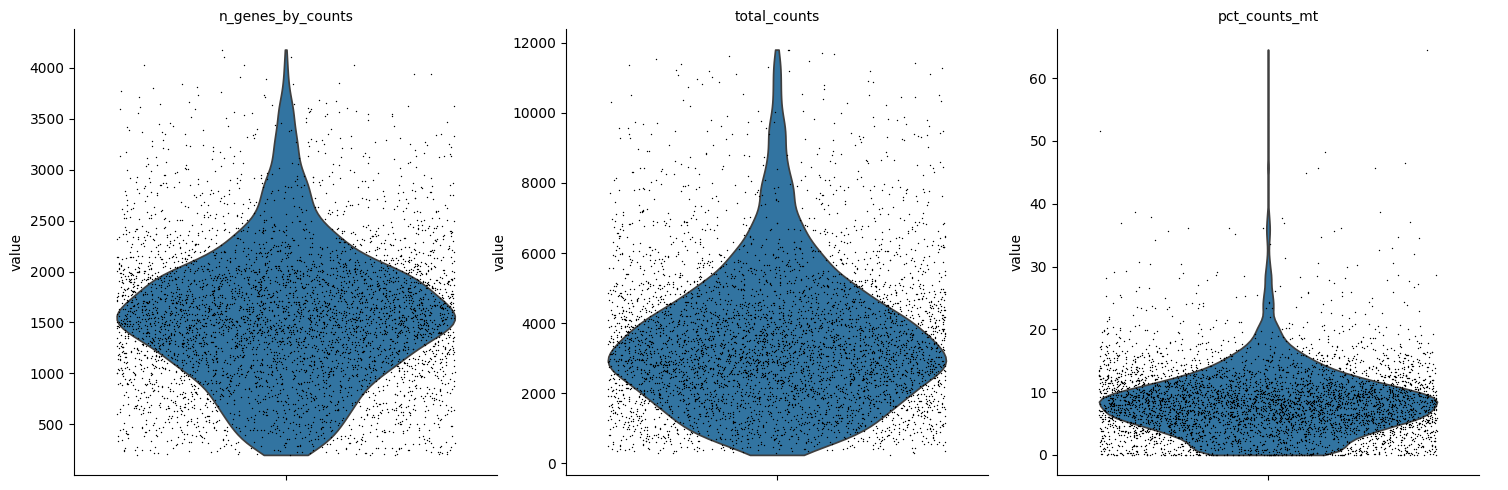

In [13]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [ ]:
sc.pl.violin(adata[adata.obs['celltype_imputed_lowerres'] == 'DC'], ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'])


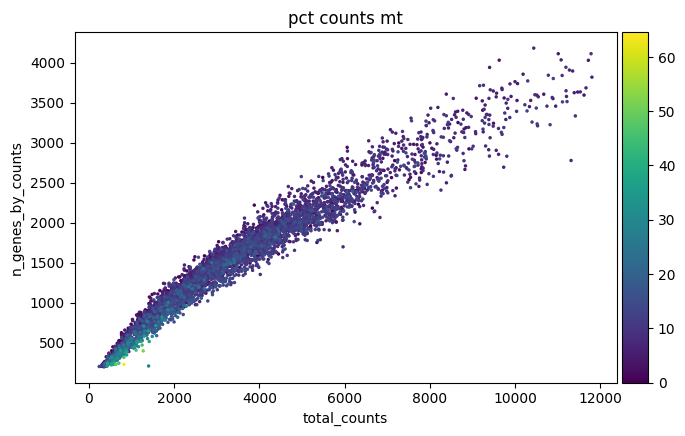

In [14]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

The scanpy team recommends starting with a low filter count since poor QC metrics can sometimes be driven by real biology. Here, the scanpy recommendation is used. scDRS filtering method incorporated in the load_h5py function default:

    sc.pp.filter_cells(adata, min_genes=250)

    sc.pp.filter_genes(adata, min_cells=50)


In [10]:
# Store raw counts
adata.layers["counts"] = adata.X.copy()


In [3]:
# Filtering data
sc.pp.filter_cells(adata, min_genes=250)
sc.pp.filter_genes(adata, min_cells=50)

## Doublet detection
Adds doublet_score and predicted_doublet to .obs. <a href=https://www.cell.com/cell-systems/fulltext/S2405-4712(18)30474-5?_returnURL>Wolock et al., 2019</a>

In [4]:
sc.pp.scrublet(adata, batch_key="batch")
print(f"Predicted doublets: {len(adata.obs[adata.obs.predicted_doublet == True])}")

Predicted doublets: 165


In [4]:
# Normalizing cell counts
# each gene count is devided by total count and multiplied by a fixed scaling factor 
sc.pp.normalize_total(adata)

# Logarithmize the data
sc.pp.log1p(adata)

# Mean-variance scaling is a normalization step used in single-cell 
# RNA sequencing (scRNA-seq) analysis to make gene expression values comparable across different genes
# standardizes gene expression by transforming each gene to have:
#     Mean = 0
#     Variance = 1
sc.pp.scale(adata, max_value=10)


# Store layer
adata.layers["normalized"] = adata.X.copy() 

## Feature selection

In [6]:
# sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="batch")

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, batch_key="batch")

c:\Users\hesse\mambaforge\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
c:\Users\hesse\mambaforge\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
c:\Users\hesse\mambaforge\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
c:\Users\hesse\mambaforge\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


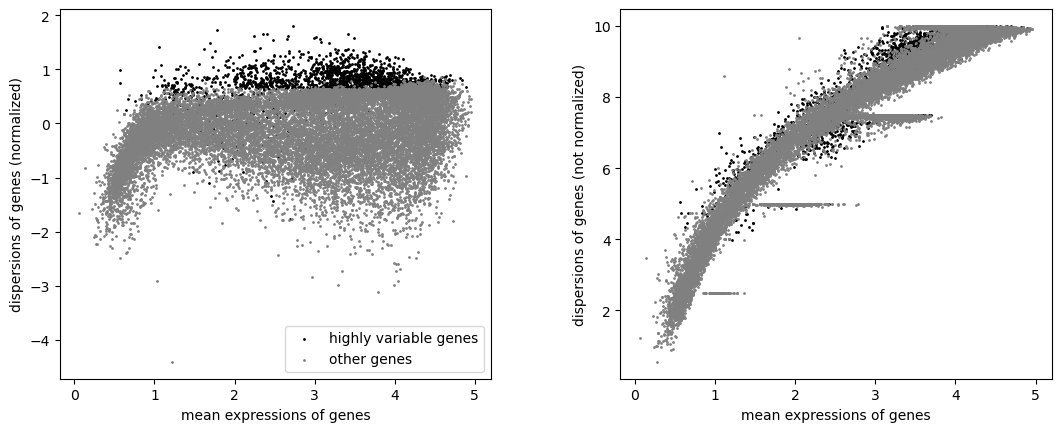

In [7]:
sc.pl.highly_variable_genes(adata)

The black dots are the genes above the selection threshold, meaning they are significantly more variable than expected given their mean expression

## Dimension reduction

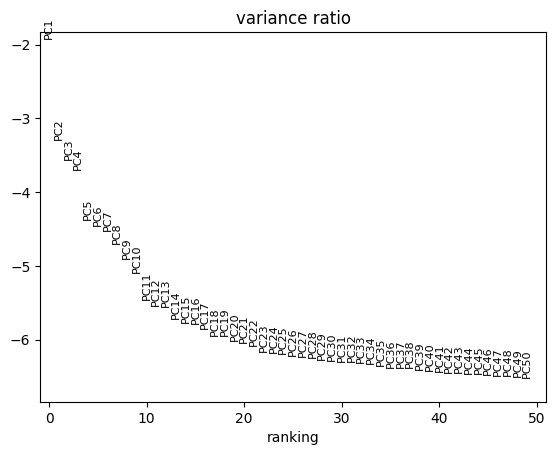

In [13]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

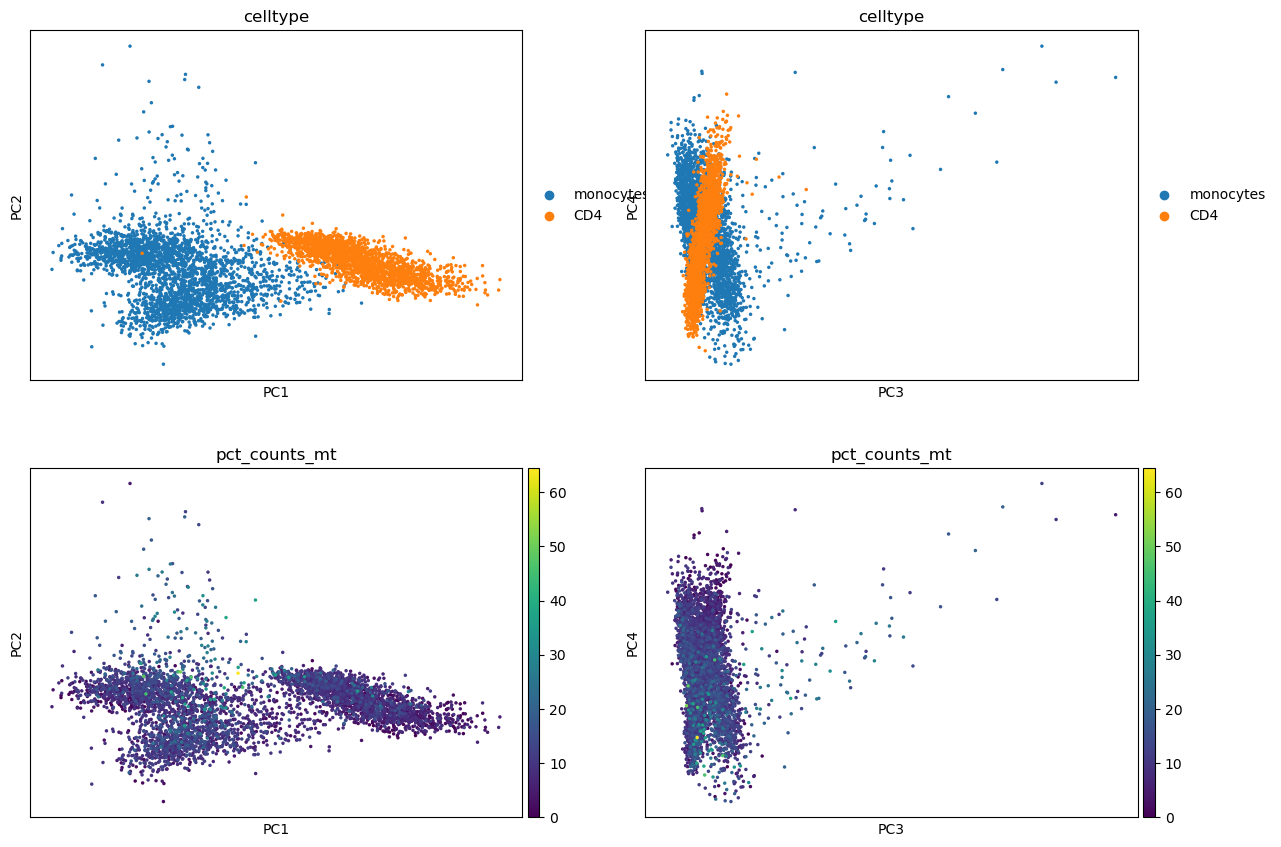

In [135]:
sc.pl.pca(
    adata,
    color=["celltype", "celltype", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
)

In [136]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

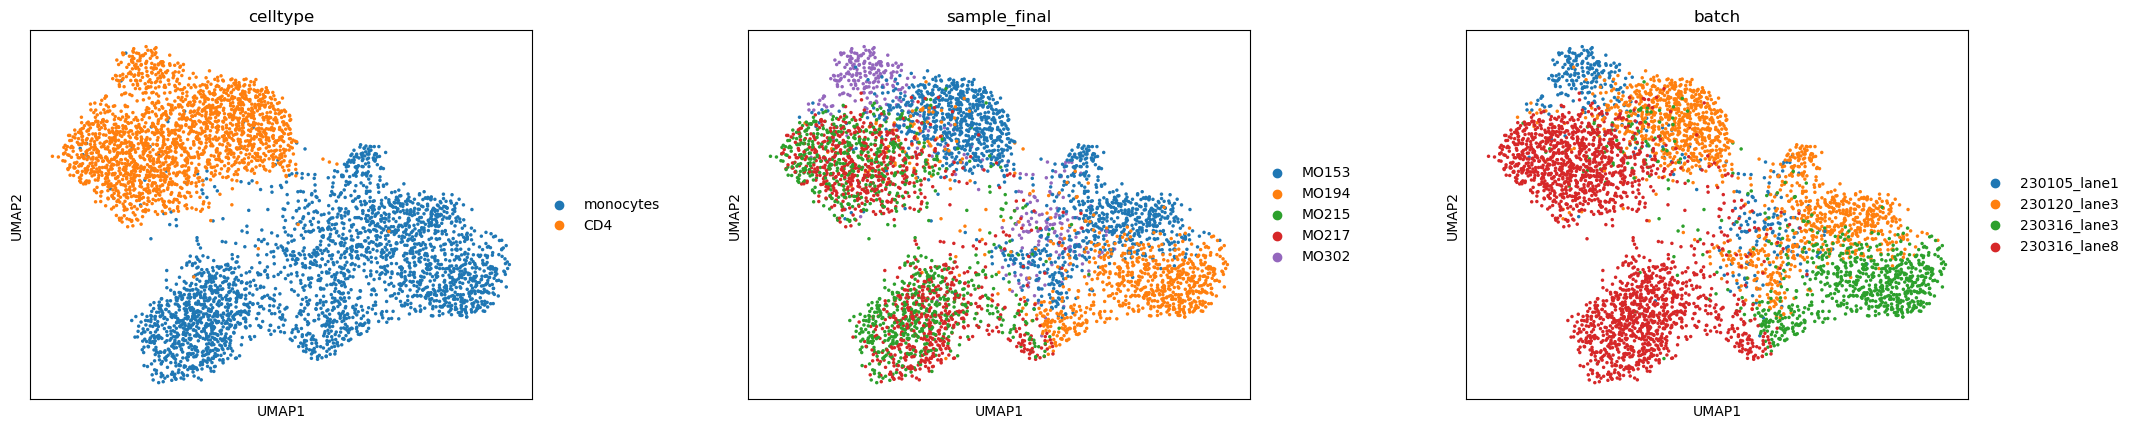

In [137]:
sc.pl.umap(
    adata,
    color=["celltype", "sample_final", "batch"],
    ncols=3,
    wspace=0.3
)


There seems to be a pretty clear batch effect. Batch and lane seem tot contain the same data.

Possible tools for fixing batch effect: https://scvi-tools.org/, https://github.com/brianhie/scanorama

tips: https://www.pythiabio.com/post/4-handy-tips-for-correcting-batch-effects-scrna-seq-analysis-101

In [138]:
adata.obs[["batch", "lane"]]

,batch,lane
CTAAGTCAGGGTGAAC_230105_lane1,230105_lane1,230105_lane1
CTGTTGGAGTGACCTG_230105_lane1,230105_lane1,230105_lane1
AGCACAGCACTCAACA_230105_lane1,230105_lane1,230105_lane1
CATATCGCACAACCTA_230105_lane1,230105_lane1,230105_lane1
TTAGAAGCAAGATTCT_230105_lane1,230105_lane1,230105_lane1
...,...,...
ACGTTACAGAAACTGG_230316_lane8,230316_lane8,230316_lane8
GAAAGCCAGTGAACCT_230316_lane8,230316_lane8,230316_lane8
ACTTAGGGTAATAACC_230316_lane8,230316_lane8,230316_lane8
CGGCCATAGGAGTAAT_230316_lane8,230316_lane8,230316_lane8


## Clustering

Leiden clustering is recommended. https://www.nature.com/articles/s41598-019-41695-z <br>
Not very necessary in this case since celltypes have already been assigned, but let's take a look anyway.

In [139]:
# sc.tl.leiden(adata, flavor="igraph", n_iterations=2, resolution=0.2)
# sc.pl.umap(adata, color=["leiden"])

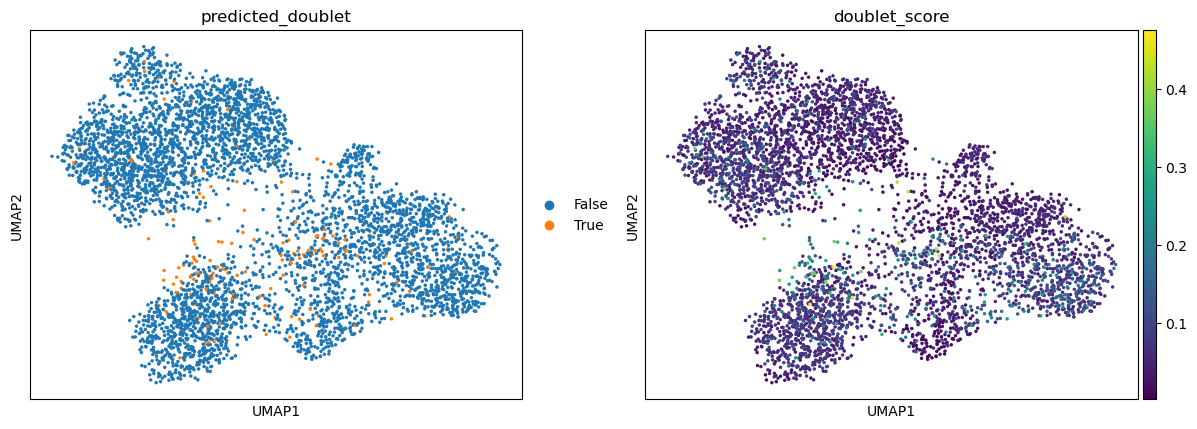

In [140]:
sc.pl.umap(
    adata,
    color=["predicted_doublet", "doublet_score"]
)

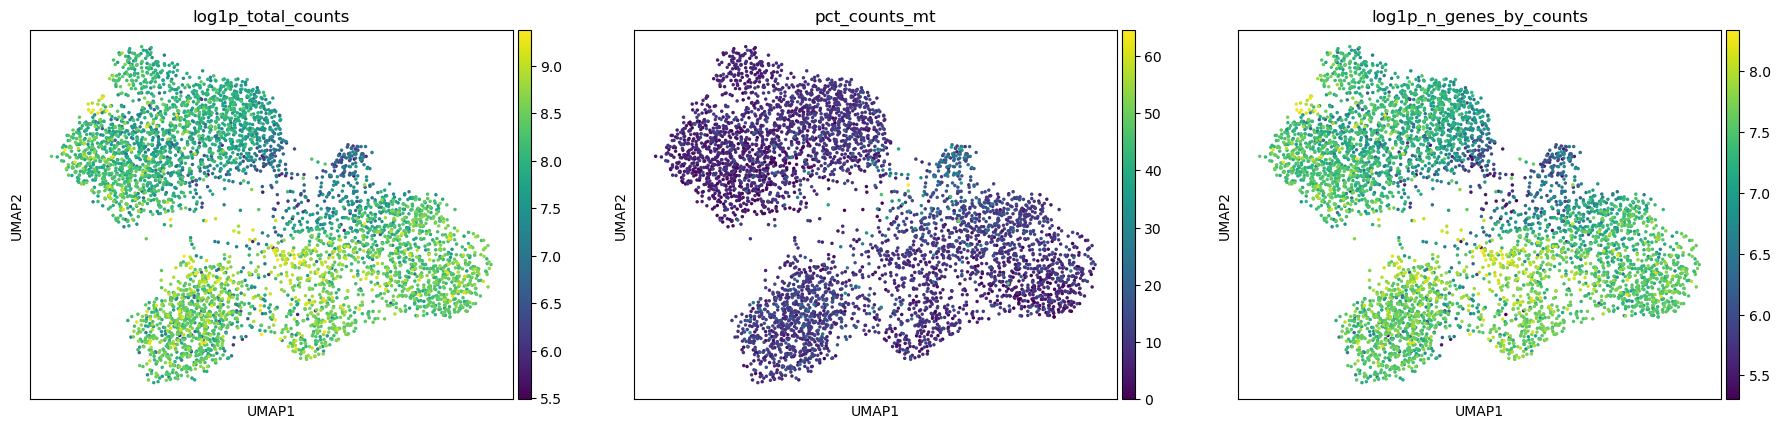

In [141]:
sc.pl.umap(
    adata,
    color=["log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    ncols=3,
)

The bottom right cluster(seems tot be 2) seems to stand out the most with the lowest amount of counts and highest percentage count of miochondrial genes. Is this because of normalization? since expression general expression is low already, does that mean that mitochondrial genes are overrepresented? Also taking the top 2000 genes vs setting threshold in highly diverentiated genes seems to make a fairly large difference.

Let's investigate using scDRS filter values

In [142]:
# Filter on stricter scDRS values.
sc.pp.filter_cells(adata, min_genes=250)
sc.pp.filter_genes(adata, min_cells=50)

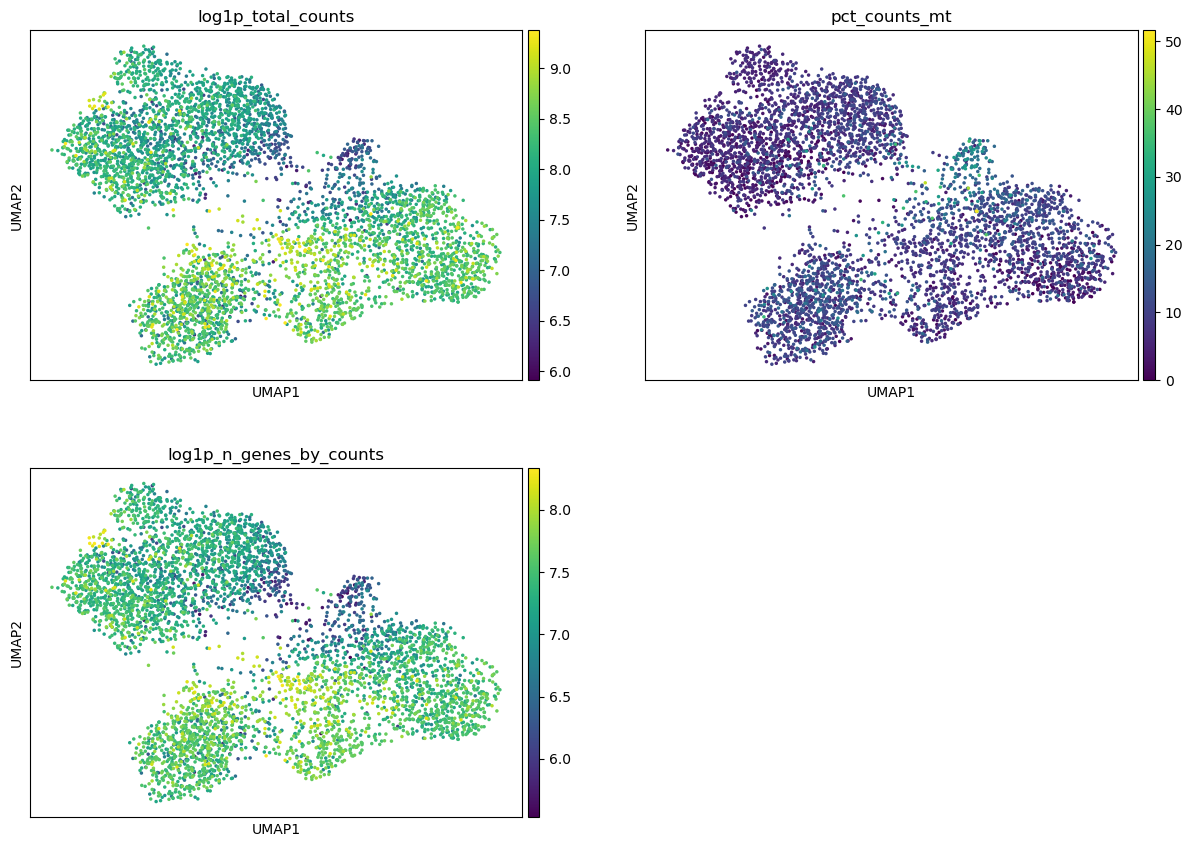

In [ ]:
sc.pl.umap(
    adata,
    color=["log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    ncols=3,
)

### Monocyte marker genes

In [ ]:
mono_adata = adata[adata.obs["celltype"] == "monocytes"]

mono_adata.X = mono_adata.layers["counts"].copy()
# adata.obs.celltype

In [4]:
mono_marker_genes = ["CTSS", "FCN1", "NEAT1", "LYZ", "PSAP", "S100A9", "AIF1", "MNDA", "SERPINA1", "TYROBP"]
cell_types = adata.obs["celltype"].unique()

results = []

for cell_type in cell_types:
    cell_adata = adata[adata.obs["celltype"] == cell_type]  # Subset for current cell type
    available_genes = [gene for gene in mono_marker_genes if gene in cell_adata.var_names]
    
    if not available_genes:
        continue  # Skip if no relevant genes are found
    
    X_subset = cell_adata[:, available_genes].X
    
    if not isinstance(X_subset, np.ndarray):  # Check if sparse
        X_dense = X_subset.toarray()
    else:
        X_dense = X_subset
    
    mean_expression = np.mean(X_dense, axis=0)
    
    for gene, mean in zip(available_genes, mean_expression):
        results.append({"Cell Type": cell_type, "Gene": gene, "Mean Expression": mean})

df_gene_mean = pd.DataFrame(results)

# Display the table
display(df_gene_mean)


,Cell Type,Gene,Mean Expression
0,monocytes,CTSS,2.021371
1,monocytes,FCN1,1.806927
2,monocytes,NEAT1,21.605011
3,monocytes,LYZ,4.061901
4,monocytes,PSAP,3.416728
5,monocytes,S100A9,0.414517
6,monocytes,AIF1,0.299189
7,monocytes,MNDA,0.194547
8,monocytes,SERPINA1,0.443257
9,monocytes,TYROBP,0.655859


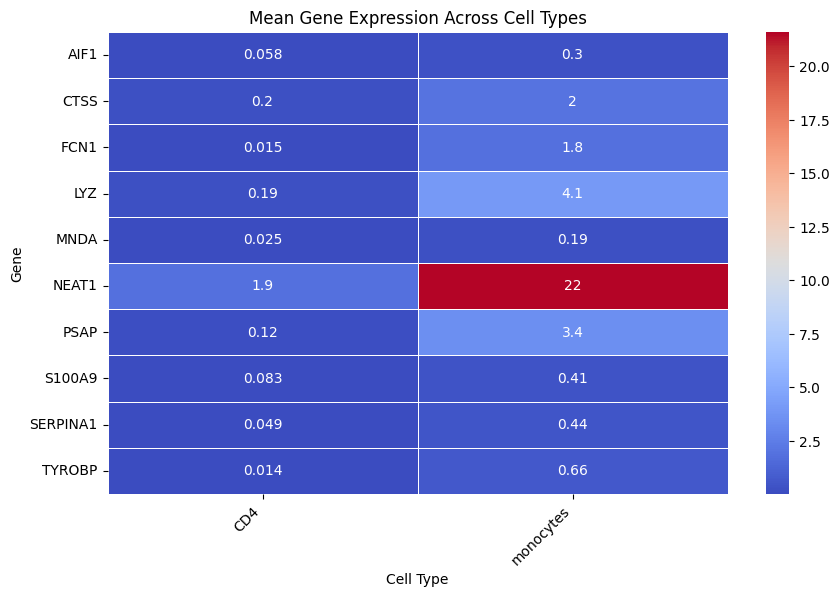

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
heatmap_data = df_gene_mean.pivot(index="Gene", columns="Cell Type", values="Mean Expression")

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mean Gene Expression Across Cell Types")
plt.xlabel("Cell Type")
plt.ylabel("Gene")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep gene names horizontal
plt.show()

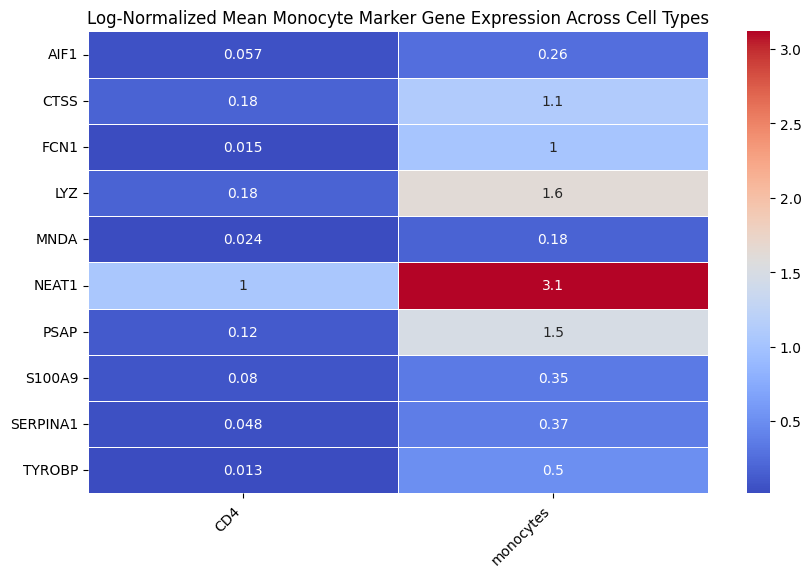

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table with genes as rows and cell types as columns
heatmap_data = df_gene_mean.pivot(index="Gene", columns="Cell Type", values="Mean Expression")

# Apply log1p transformation (log(x + 1) to avoid log(0))
log_heatmap_data = np.log1p(heatmap_data)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(log_heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Log-Normalized Mean Monocyte Marker Gene Expression Across Cell Types")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.yticks(rotation=0)  # Keep gene names horizontal

plt.xlabel("")  # Remove x-axis label
plt.ylabel("")  # Remove y-axis label

plt.show()


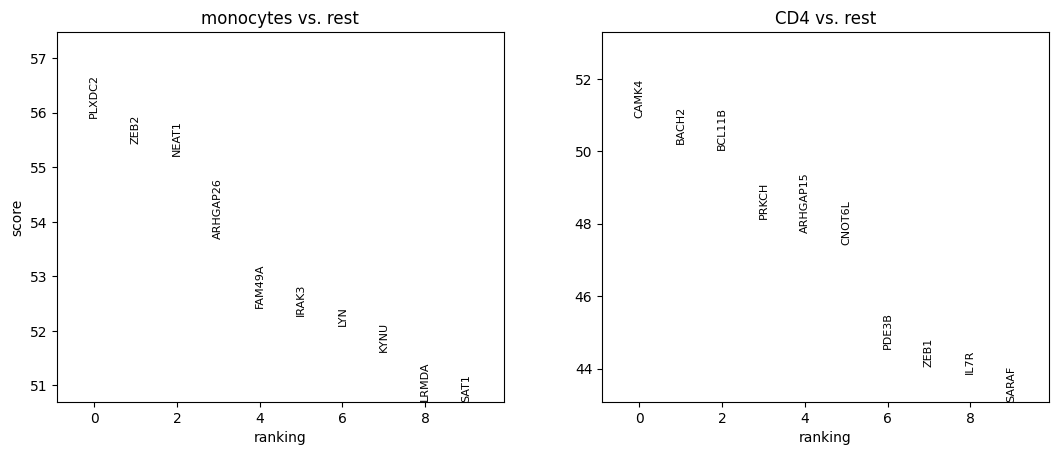

       names     scores  logfoldchanges  pvals  pvals_adj
0     PLXDC2  55.914959        9.968960    0.0        0.0
1       ZEB2  55.437935        7.314034    0.0        0.0
2      NEAT1  55.205200        3.867720    0.0        0.0
3   ARHGAP26  53.680485        4.149016    0.0        0.0
4     FAM49A  52.431068        9.703900    0.0        0.0
5      IRAK3  52.280254        9.714138    0.0        0.0
6        LYN  52.093994        8.763855    0.0        0.0
7       KYNU  51.613247       10.131968    0.0        0.0
8      LRMDA  50.713249        9.584993    0.0        0.0
9       SAT1  50.700645        4.342697    0.0        0.0
10     DMXL2  50.605446        8.550514    0.0        0.0
11    SLC8A1  49.672729       10.218326    0.0        0.0
12   SLC11A1  48.858524        9.192916    0.0        0.0
13     MCTP1  48.485031        8.507884    0.0        0.0
14      VCAN  48.400318        7.969980    0.0        0.0


In [5]:
# Wilcoxon test
sc.tl.rank_genes_groups(adata, groupby="celltype", use_raw=False, method="wilcoxon", layer="normalized")
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)
wilcoxon_markers = sc.get.rank_genes_groups_df(adata, group="monocytes")
print(wilcoxon_markers.head(15)) 

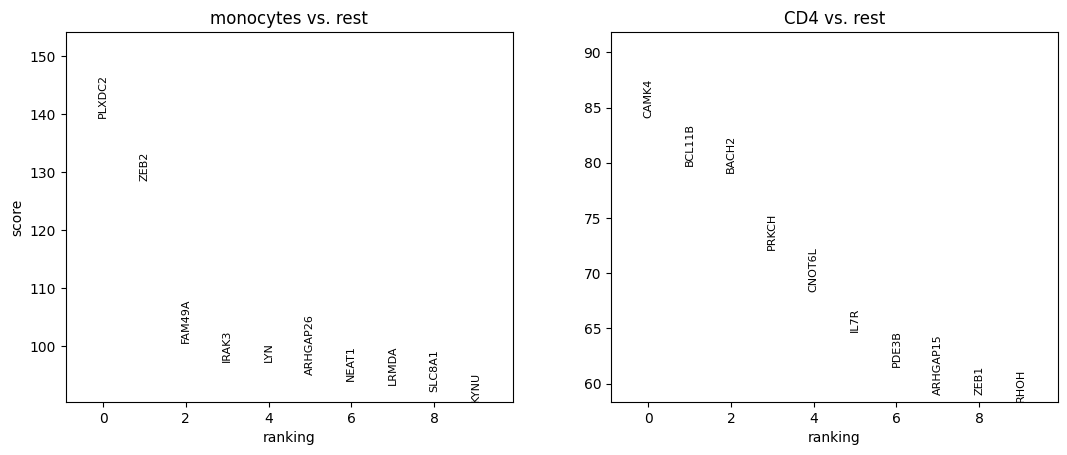

       names      scores  logfoldchanges  pvals  pvals_adj
0     PLXDC2  139.435837        9.968960    0.0        0.0
1       ZEB2  128.587021        7.314034    0.0        0.0
2     FAM49A  100.578857        9.703900    0.0        0.0
3      IRAK3   97.301575        9.714138    0.0        0.0
4        LYN   97.259102        8.763855    0.0        0.0
5   ARHGAP26   95.039001        4.149016    0.0        0.0
6      NEAT1   94.116280        3.867720    0.0        0.0
7      LRMDA   93.266777        9.584993    0.0        0.0
8     SLC8A1   92.126183       10.218326    0.0        0.0
9       KYNU   90.428963       10.131968    0.0        0.0
10     DMXL2   85.722420        8.550514    0.0        0.0
11      SAT1   83.899582        4.342697    0.0        0.0
12   SLC11A1   80.510948        9.192916    0.0        0.0
13     MCTP1   79.899338        8.507884    0.0        0.0
14      VCAN   79.235046        7.969980    0.0        0.0


In [6]:
# t-test_overestim_var
sc.tl.rank_genes_groups(adata, groupby="celltype", use_raw=False, layer="normalized")
sc.pl.rank_genes_groups(adata, n_genes=10, sharey=False)
ttest_markers = sc.get.rank_genes_groups_df(adata, group="monocytes")
print(min(ttest_markers))

In [7]:
monocyte_degs = list(wilcoxon_markers["names"][0:10])
print(monocyte_degs)

['PLXDC2', 'ZEB2', 'NEAT1', 'ARHGAP26', 'FAM49A', 'IRAK3', 'LYN', 'KYNU', 'LRMDA', 'SAT1']
